# Step 1 : Camera Caliberation

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
from collections import deque
%matplotlib inline

# Image Paths

In [2]:
chess_image_list = glob.glob('camera_cal/calibration*.jpg')
images_list = glob.glob('test_images/test*.jpg')

In [3]:
def plot_images(img_1,img_2,row_no=1,col_no=2,size=(9,6),title_ax1="Original Image",title_ax2="Changed Image",gray=False):
    f, (ax1, ax2) = plt.subplots(row_no, col_no, figsize=size)
    ax1.imshow(img_1)
    ax1.set_title(title_ax1, fontsize=20)
    if gray:
        ax2.imshow(img_2,cmap='gray')
    else:
        ax2.imshow(img_2)
    ax2.set_title(title_ax2, fontsize=20)

In [4]:
def camera_calibration(image_list,nx=9,ny=6):
    objectPoints = np.zeros((6*9,3), np.float32)
    objectPoints[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    #image_list = glob.glob('camera_cal/calibration*.jpg')
    i =1
    for fname in image_list:
            #image_name = cal_image.split('/', 1 )[1]
            file_name='test'
            img = cv2.imread(fname)
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray_image, (nx,ny), None)
            # If found, add object points, image points
            if ret == True:
                objpoints.append(objectPoints)
                imgpoints.append(corners)
                # Draw and display the corners
                cv2.drawChessboardCorners(img, (9,6), corners, ret)
                plot_images(cv2.cvtColor(mpimg.imread(fname), cv2.COLOR_BGR2RGB),cv2.cvtColor(img, cv2.COLOR_BGR2RGB),1,2,(9,6),"Original Image",title_ax2="Changed Image")
            else:
                print("This image doesn't have the corner of (9,6)")
    return objpoints,imgpoints

This image doesn't have the corner of (9,6)
This image doesn't have the corner of (9,6)
This image doesn't have the corner of (9,6)


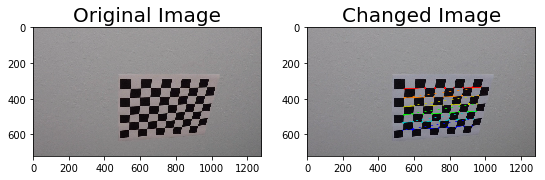

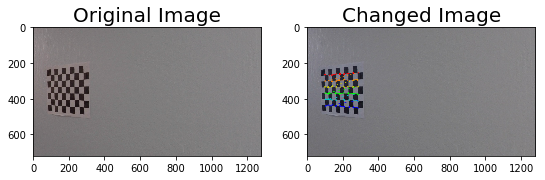

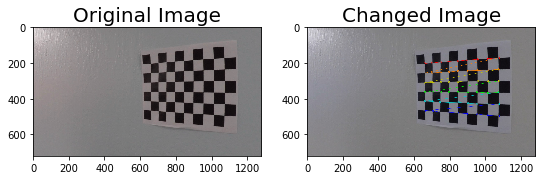

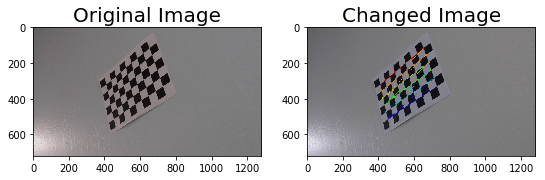

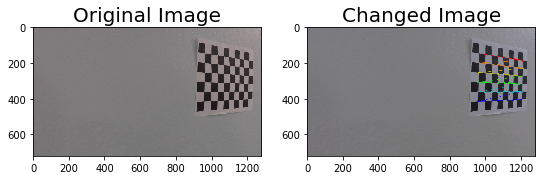

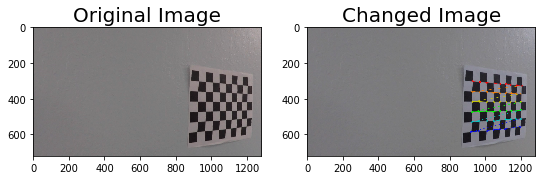

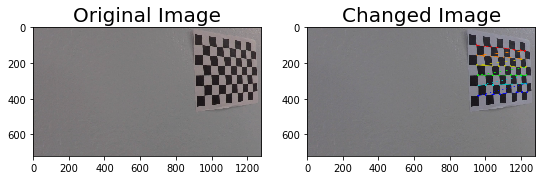

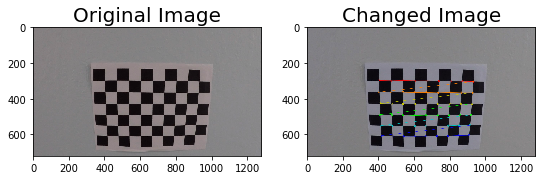

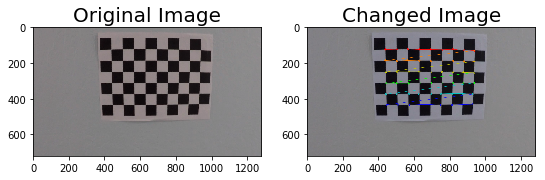

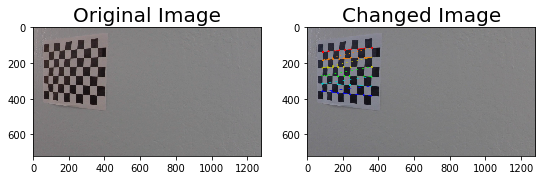

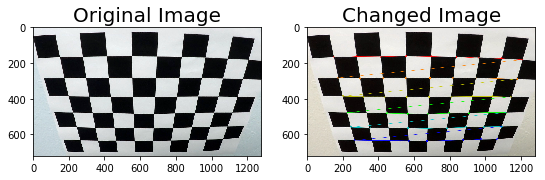

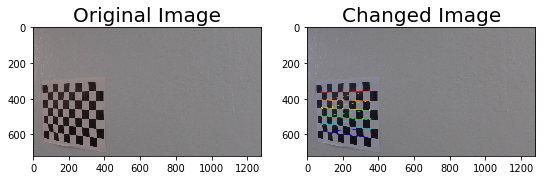

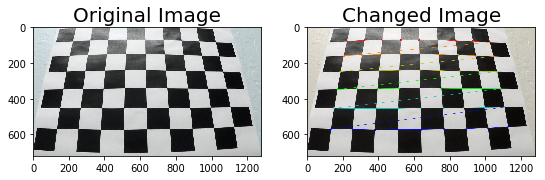

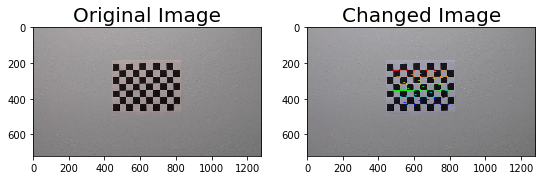

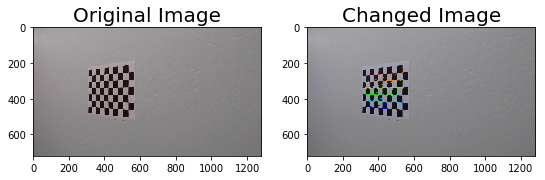

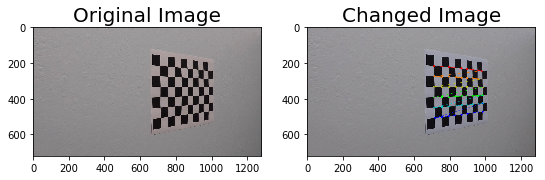

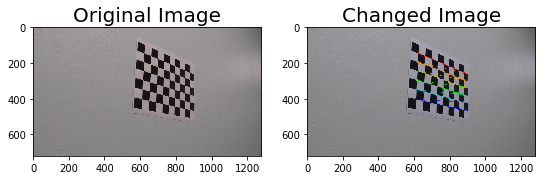

In [5]:
objpoints,imgpoints=camera_calibration(chess_image_list,9,6)

# 2. Undistorting Image 

In [6]:
# Remove distortion from images
def remove_distortion(image,read_flag=False):
    if read_flag:
        img = cv2.imread(image)
    else:
        img=image
    img_size = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    remove_dist = cv2.undistort(img, mtx, dist, None, mtx)
    return remove_dist

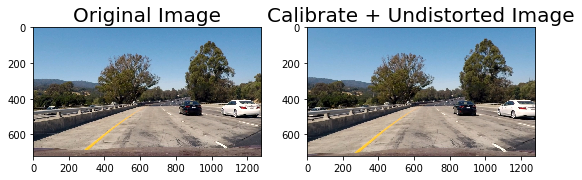

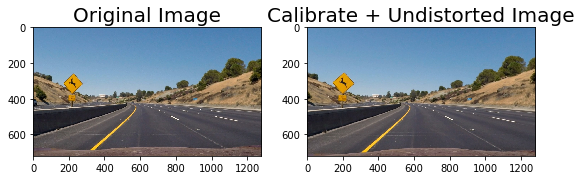

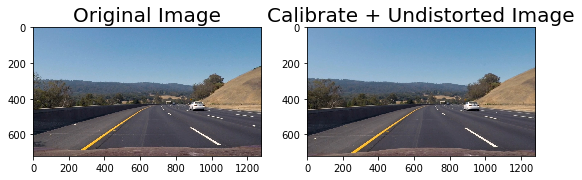

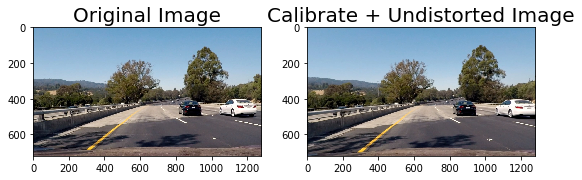

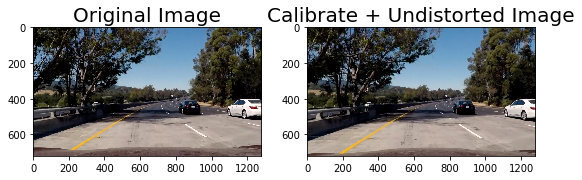

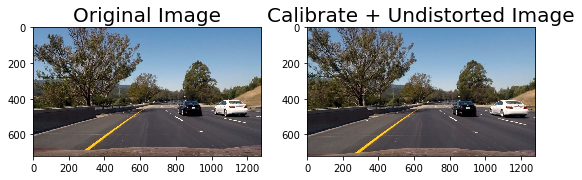

In [7]:
for image in images_list:
    remove_dist=remove_distortion(image,True)
    plot_images(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB),cv2.cvtColor(remove_dist, cv2.COLOR_BGR2RGB),1,2,(9,6),"Original Image","Calibrate + Undistorted Image")

# Testing

[[114 110 101 ...,  67  62  55]
 [114 108  80 ...,  70  62  58]
 [110 103  51 ...,  70  66  58]
 ..., 
 [103 126 170 ...,   5   5   5]
 [103 114 160 ...,   5   5   5]
 [106 115 160 ...,   5   5   5]]
uint8


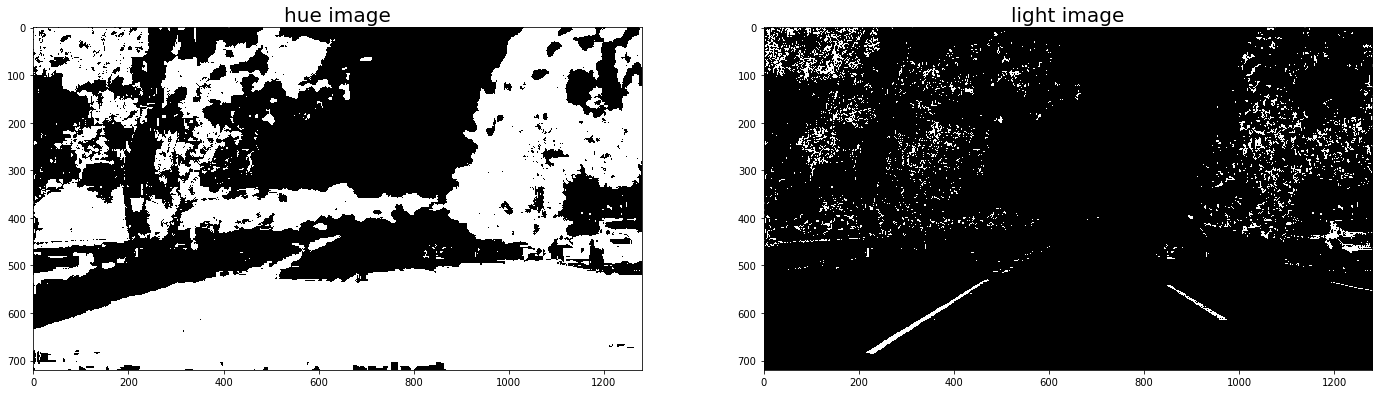

In [8]:
test = glob.glob('test_images/test5.jpg')
#img = cv2.imread(test[0])
img=mpimg.imread(test[0])
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
h=hls[:,:,0]
l=hls[:,:,1]
s=hls[:,:,2]
thresh_h=(0,90)
thresh_s=(170,255)
binary = np.zeros_like(h)
binary[(h > thresh_h[0]) & (h <= thresh_h[1])] = 1
binary_s = np.zeros_like(s)
binary_s[(s > thresh_s[0]) & (s <= thresh_s[1])] = 1
combined_binary = np.zeros_like(binary_s)
combined_binary[(binary==1) & (binary_s==1)] = 1
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
print(h)
ax1.imshow(binary,cmap='gray')
ax1.set_title("hue image", fontsize=20)
ax2.imshow(combined_binary,cmap='gray')
ax2.set_title("light image", fontsize=20)
#ax3.imshow(s)
#ax3.set_title("sat image", fontsize=20)
print(binary.dtype)

NameError: name 'perspective_transform' is not defined

# 3. Color Channel Filtering 

In [ ]:
def color_channel_filtering(img,channel="S",read_flag=False):   
    image = remove_distortion(img,read_flag)
    if channel == "S":
        hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        S = hls[:,:,2]
        thresh = (90, 255)
        binary = np.zeros_like(S)
        binary[(S > thresh[0]) & (S <= thresh[1])] = 1
    elif channel =="H":
        hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        H = hls[:,:,0]
        thresh = (15, 100)
        binary = np.zeros_like(H)
        binary[(H > thresh[0]) & (H <= thresh[1])] = 1
    elif channel =="L":
        hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
        L = hls[:,:,1]
        thresh = (15, 100)
        binary = np.zeros_like(H)
        binary[(H > thresh[0]) & (H <= thresh[1])] = 1
    elif channel =="Gray":
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        thresh = (180, 255)
        binary = np.zeros_like(gray)
        binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1
    elif channel =="R":
        R = image[:,:,0]
        thresh = (200, 255)
        binary = np.zeros_like(R)
        binary[(R > thresh[0]) & (R <= thresh[1])] = 1
    elif channel =="C":
        hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
        ## White Color
        lower_white = np.array([0,200,0], dtype=np.uint8)
        upper_white = np.array([255,255,255], dtype=np.uint8)
        white_mask = cv2.inRange(hls, lower_white, upper_white)
        ## Yellow Color
        lower_yellow = np.array([18,25,100], dtype=np.uint8)
        upper_yellow = np.array([30,220,255], dtype=np.uint8)
        yellow_mask = cv2.inRange(hls, lower_yellow, upper_yellow)
        final_image = cv2.bitwise_and(hls,hls, mask = white_mask | yellow_mask)
#         combined_binary = np.zeros_like(white_mask)
#         combined_binary[(white_mask == 255) | (yellow_mask  == 30 )]=1
        final_image = cv2.cvtColor( final_image, cv2.COLOR_HLS2BGR)
        #final_image = cv2.cvtColor( final_image, cv2.COLOR_BGR2GRAY)
        return final_image
    else:
        print("Invalid value for color channel(Can take on )")
        return 0   
    return binary

In [ ]:
for image in images_list:
    #print(image.split('/', 1 ))
    binary=color_channel_filtering(image,"C",True)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))
    f.tight_layout()
    ax1.imshow(cv2.cvtColor( cv2.imread(image), cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image', fontsize=20)
    ax2.imshow(binary)
    ax2.set_title('Channel yellow and white', fontsize=20)

In [ ]:
for image in images_list:
    #print(image.split('/', 1 ))
    binary=color_channel_filtering(image,"S",True)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))
    f.tight_layout()
    ax1.imshow(cv2.cvtColor( cv2.imread(image), cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image', fontsize=20)
    ax2.imshow(binary, cmap='gray')
    ax2.set_title('Channel S', fontsize=20)

# 4. Sobel Function , Gradient Thresholds

In [ ]:
def magnitude_sobel_thresh(img, sobel_kernel=3, mag_thresh=(30, 100),read_flag=False): 
    if read_flag:
         image = cv2.cvtColor(cv2.imread(img),cv2.COLOR_RGB2GRAY) 
    else:
        image=img
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    scaled_sobel = np.uint8(255*gradmag/np.max(gradmag))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    return binary_output

In [ ]:
def direction_sobel_threshold(img, sobel_kernel=3, thresh=(0, 3.10),read_flag=False):  
    if read_flag:
         image = cv2.cvtColor(cv2.imread(img),cv2.COLOR_RGB2GRAY) 
    else:
        image=img
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    return binary_output

In [ ]:
def abs_sobel_threshold(img,sobel_kernel=3,axis='x',thresh=(20,100),read_flag=False ):
    if read_flag:
         image =cv2.cvtColor(cv2.imread(img),cv2.COLOR_RGB2GRAY) 
    else:
        image=img
    if axis =='x':
        sobel_orient = cv2.Sobel(image, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
    elif axis =='y':
        sobel_orient = cv2.Sobel(image, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
    else:
        print("Wrong choice")
        return 0 
    abs_sobel = np.absolute(sobel_orient) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Threshold x gradient
    sobel_binary = np.zeros_like(scaled_sobel)
    sobel_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1  
    return sobel_binary 

In [ ]:
def combine_all_sobel_threshold(image,convertTo="G",kernal_size=15,read_flag=False):
    if read_flag:
        img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2HLS)
        img=img[:,:,2]
    else:
        img=image
    if convertTo =='G':
        img_con=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img_con=cv2.cvtColor(img_con,cv2.COLOR_RGB2GRAY)
    else:
        img_con=image
    img_con=remove_distortion(img_con)
    sobel_x=abs_sobel_threshold(img_con,kernal_size,"x")
    sobel_y=abs_sobel_threshold(img_con,kernal_size,"y")
    dir_sobel=direction_sobel_threshold(img_con,kernal_size)
    mag_sobel=magnitude_sobel_thresh(img_con,kernal_size)
    combined_binary = np.zeros_like(dir_sobel)
    combined_binary[((sobel_x == 1) | (sobel_y == 1) ) & ((mag_sobel == 1) | (dir_sobel == 1))] = 1
    return combined_binary

In [ ]:
for image in images_list:         
    #print(image.split('/', 1 ))
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h=hls[:,:,0]
    l=hls[:,:,1]
    s=hls[:,:,2]
    thresh_h=(0,90)
    thresh_s=(170,255)
    binary = np.zeros_like(h)
    binary[(h > thresh_h[0]) & (h <= thresh_h[1])] = 1
    binary_s = np.zeros_like(s)
    binary_s[(s > thresh_s[0]) & (s <= thresh_s[1])] = 1
    combined_binary = np.zeros_like(binary_s)
    combined_binary[(binary==1) & (binary_s==1)] = 1
    #sobel_binary_x=abs_sobel_threshold(image,7,"x",(20,100),True)
    #sobel_binary_y=abs_sobel_threshold(image,7,"y",(20,100),True)   
    #dir_sobel=direction_sobel_threshold(image,15,(0.7, 1.3),True)
    #mag_sobel=magnitude_sobel_thresh(image,5,(30, 100),True)
    #combined_sobel=combine_all_sobel_threshold(image,'G',15,True)
    sobel_binary_x=abs_sobel_threshold(combined_binary,7,"x",(20,100))
    sobel_binary_y=abs_sobel_threshold(combined_binary,7,"y",(20,100))   
    dir_sobel=direction_sobel_threshold(combined_binary,15,(0.7, 1.3))
    mag_sobel=magnitude_sobel_thresh(combined_binary,5,(30, 100))
    combined_sobel=combine_all_sobel_threshold(combined_binary,'I',15)
    f, (ax1, ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize=(15, 10))
    f.tight_layout()
    ax1.imshow(cv2.cvtColor( cv2.imread(image), cv2.COLOR_BGR2GRAY),cmap='gray')
    #ax1.imshow(l)
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(sobel_binary_x, cmap='gray')
    ax2.set_title('sobel binary x', fontsize=10)
    ax3.imshow(sobel_binary_y, cmap='gray')
    ax3.set_title('sobel binary y', fontsize=10)
    ax4.imshow(dir_sobel, cmap='gray')
    ax4.set_title('sobel direction', fontsize=10)
    ax5.imshow(mag_sobel, cmap='gray')
    ax5.set_title('sobel magnitude', fontsize=10)
    ax6.imshow(combined_sobel, cmap='gray')
    ax6.set_title('sobel combined', fontsize=10)

# Combining Color filtering and Sobel

In [ ]:
# Testing on one image
def combine_color_gradient(image,read_flag=False):
    if read_flag:
        img = cv2.imread(image)
    else:
        img=image
    combine_sobel=combine_all_sobel_threshold(img,"L")
    color=color_channel_filtering(img)
    color_binary = np.dstack(( np.zeros_like(combine_sobel), combine_sobel, color)) * 255
    combined_binary = np.zeros_like(combine_sobel)
    combined_binary[(color == 1) | (combine_sobel[:,:,0] == 1)] = 1
    return combined_binary

In [ ]:
for image in images_list:
    com_im=combine_color_gradient(image,True)
    plot_images(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB),com_im,1,2,(9,6),"Original Image","Color+Gradiant Image",True)

# 5.Perspective Transform

In [ ]:
def perspective_transform(image,src, dst,read_flag=False):
    if read_flag:
        img = cv2.imread(image)
    else:
        img=image    
    img_size = (image.shape[1], image.shape[0])
    offset = 0
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(image, M, img_size)
    src_pt=np.array(src, np.int32)
    dst_pt=np.array(dst,np.int32)
    #cv2.polylines(remove_dist_img,[src_pt],True,(200,50,0),8)
    #cv2.polylines(warped,[dst_pt],True,(200,50,0),8)
    return warped

# Pre-Processing Pipe Line 

In [ ]:
def pre_processing_pipe_line(image,read_flag=False):
    if read_flag:
        img = cv2.imread(image)
    else:
        img=image 
    src = np.float32([(580, 460), (205, 720), (1110, 720), (703, 460)])
    dst = np.float32([(320, 0), (320, 720), (960, 720), (960, 0)])
    #color_channel=color_channel_filtering(img,"C")
    com_im=combine_color_gradient(img)
    bird_eye_view=perspective_transform(com_im,src,dst)
    #pipe_line_image=combine_all_sobel_threshold(bird_eye_view,"L")
    return bird_eye_view

In [ ]:
for image in images_list:
    com_im=pre_processing_pipe_line(image,True)
    plot_images(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB),com_im,1,2,(9,6),"Original Image","Pipelined Image",True)

In [ ]:
def get_variable_assigned(binary_warped,nwindows):
    histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    window_height = np.int(binary_warped.shape[0]/nwindows)
    return histogram,leftx_base, rightx_base,window_height
    

In [ ]:
test= glob.glob('test_images/straight_lines2.jpg')
for image in test:
    #img = cv2.imread(image)
    wr=pre_processing_pipe_line(image,True)
    histogram,leftx_base, rightx_base,window_height=get_variable_assigned(wr,9)

In [ ]:
print(leftx_base, rightx_base,window_height)
plt.plot(histogram)

In [11]:
def first_line_serach(bird_eye_image,display_flag=False):
    histogram,left_x_base, right_x_base,window_height=get_variable_assigned(bird_eye_image,9)
    # Identify the x and y positions of all nonzero pixels in the image
    non_zero = binary_warped.nonzero()
    non_zero_y_position = np.array(non_zero[0])
    non_zero_x_position = np.array(non_zero[1])
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    coordinates_left_lane = []
    coordinates_right_lane = []
    num_of_windows=9
    out_img = np.dstack((bird_eye_image, bird_eye_image, bird_eye_image))*255
    for window in range(num_of_windows):
        # Identify window boundaries in x and y (and right and left)
        y_low = bird_eye_image.shape[0] - (window+1)*window_height
        y_high = bird_eye_image.shape[0] - window*window_height
        x_left_low = left_x_base - margin
        x_left_high = left_x_base + margin
        x_right_low = right_x_base - margin
        x_right_high = right_x_base + margin
        # Draw the windows on the visualization image
        if display_flag :
            cv2.rectangle(out_img,(x_left_low,y_low),(x_left_high,y_high),(0,255,0), 2) 
            cv2.rectangle(out_img,(x_right_low,y_low),(x_right_high,y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        window_good_left_inds = ((non_zero_y_position >= y_low) & (non_zero_y_position < y_high) &
                                 (non_zero_x_position >= x_left_low) &  (non_zero_x_position < x_left_high)).nonzero()[0]
        if len(window_good_left_inds) > minpix:
            left_x_base = np.int(np.mean(non_zero_x_position[window_good_left_inds]))
        window_good_right_inds = ((non_zero_y_position >= y_low) & (non_zero_y_position < y_high) & 
                                  (non_zero_x_position >= x_right_low) &  (non_zero_x_position < x_right_high)).nonzero()[0]
        if len(window_good_right_inds) > minpix:        
            right_x_base = np.int(np.mean(non_zero_x_position[window_good_right_inds]))
        
        # Append these indices to the lists
        coordinates_left_lane.append(window_good_left_inds)
        coordinates_right_lane.append(window_good_right_inds)
    return polyfit_curve(np.concatenate(coordinates_left_lane),np.concatenate(coordinates_right_lane),non_zero_x_position,non_zero_y_position,bird_eye_image.shape[0])

In [12]:
def polyfit_curve(left_lane,right_lane,non_zero_x,non_zero_y,image_rows):
    # Extract left and right line pixel positions
    x_left = non_zero_x[left_lane]
    y_left = non_zero_y[left_lane] 
    x_right = non_zero_x[right_lane]
    y_right = non_zero_y[right_lane] 
    # Fit the polynomial
    left_lane_polyfit = np.polyfit(y_left, x_left, 2)
    right_lane_polyfit= np.polyfit(y_right, x_right, 2)
    y_points = np.linspace(0, image_rows-1, image_rows)
    # Generate the lane lines from the polynomial fit
    left_polyfit = left_lane_polyfit[0]*y_points**2 + left_lane_polyfit[1]*y_points + left_lane_polyfit[2]
    right_polyfit = right_lane_polyfit[0]*y_points**2 + right_lane_polyfit[1]*y_points + right_lane_polyfit[2]
    
    return left_polyfit, right_polyfit

In [ ]:
def finding_lanes(image,no_windows=9,read_flag=False):
    warped=perspective_transform(image,src,dst,read_flag)
    histogram,leftx_base, rightx_base,window_height=get_variable_assigned(no_windows,9)
    #This stores the x.y coordinate where the image is having non-zero values
    nonzero = binary_warped.nonzero()
    #To get all the non-zero values for the y-coordinate 
    y_pts_nonzero = np.array(nonzero[0])
    #To get all the non-zero values for the x-coordinate 
    x_pts_nonzero = np.array(nonzero[1])
    

In [ ]:
def process_flow(image):
    

In [ ]:
   else:
        # Else search in a margin of 100 pixels on each side of the pervious polynomial fit
        brute = False
        margin = 100
        left_x_predictions = polyfit_left[0]*non_zeros_y**2 + polyfit_left[1]*non_zeros_y + polyfit_left[2]
        left_coordinates = ((non_zeros_x >= left_x_predictions - margin) & (non_zeros_x <= left_x_predictions + margin)).nonzero()[0]

        right_x_predictions = polyfit_right[0]*non_zeros_y**2 + polyfit_right[1]*non_zeros_y + polyfit_right[2]
        right_coordinates = ((non_zeros_x >= right_x_predictions - margin) & (non_zeros_x <= right_x_predictions + margin)).nonzero()[0]
        
        left_x_predictions, right_x_predictions = get_line_predictions(non_zeros_x, non_zeros_y, left_coordinates, right_coordinates, num_rows)
    
    if (left_x_predictions is None or right_x_predictions is None):
        if not brute:
            left_x_predictions, right_x_predictions = brute_search(warped)

In [ ]:
# compute the radius of curvature
    left_curve_rad = measure_radius_of_curvature(left_x_predictions)
    right_curve_rad = measure_radius_of_curvature(right_x_predictions)
    average_curve_rad = (left_curve_rad + right_curve_rad)/2
    curvature_string = "Radius of curvature: %.2f m" % average_curve_rad
    
    # compute the offset from the center
    lane_center = (right_x_predictions[num_rows-1] + left_x_predictions[num_rows-1])/2
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    center_offset_pixels = abs(img_size[0]/2 - lane_center)
    center_offset_mtrs = xm_per_pix*center_offset_pixels
    offset_string = "Center offset: %.2f m" % center_offset_mtrs
    
    poly_points = np.vstack([left_line_window, right_line_window])
    
    cv2.fillPoly(out_img, np.int_([poly_points]), [0,255, 0])
    
    unwarped = cv2.warpPerspective(out_img, M_inv, img_size , flags=cv2.INTER_LINEAR)

    result = cv2.addWeighted(img, 1, unwarped, 0.3, 0)
    
    cv2.putText(result,curvature_string , (100, 90), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
    cv2.putText(result, offset_string, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
    
    return result